# 🧠 Marvel Knowledge Graph - Exploration Notebook
This notebook loads and visualizes a knowledge graph constructed from Marvel character data.
It uses `networkx` for graph structure and `matplotlib` for visualization.

The graph includes:
- Characters
- Teams
- Genes / Mutations
- Powers

And relationships like:
- `MEMBER_OF`
- `HAS_MUTATION`
- `CONFERS`
- `POSSESSES_POWER`


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import numpy as np
from pathlib import Path
import sys
import json

current_dir = Path.cwd()
project_root = None

# Look for the project root by checking for app directory
for parent in [current_dir] + list(current_dir.parents):
    if (parent / "app").exists() and (parent / "app" / "kg_query_engin.py").exists():
        project_root = parent
        break

if project_root is None:
    # Fallback: assume we're in the notebooks directory
    project_root = current_dir.parent

sys.path.insert(0, str(project_root))

from app.kg_query_engin import KnowledgeGraph, QueryInterpreter, GraphExecutor
from app.config import DATA

# Load the knowledge graph
kg = KnowledgeGraph.from_graphml(DATA / "marvel_kg.graphml")
print(f"✅ Loaded knowledge graph with {len(kg.G.nodes)} nodes and {len(kg.G.edges)} edges")

/Users/danielmashala/workshop/marvel-graph-llm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Loaded knowledge graph with 34 nodes and 48 edges


### Knowledge Graph Statistics

In [11]:
print("=" * 50)

# Count nodes by type
node_types = {}
for node, attrs in kg.G.nodes(data=True):
    node_type = attrs.get('label', 'Unknown')
    node_types[node_type] = node_types.get(node_type, 0) + 1

print("📊 Node Types:")
for node_type, count in sorted(node_types.items()):
    print(f"   {node_type}: {count}")

# Count edges by relation type
edge_types = {}
for _, _, attrs in kg.G.edges(data=True):
    edge_type = attrs.get('type', 'Unknown')
    edge_types[edge_type] = edge_types.get(edge_type, 0) + 1

print("\n🔗 Edge Types:")
for edge_type, count in sorted(edge_types.items()):
    print(f"   {edge_type}: {count}")

print(f"\n📈 Total Nodes: {len(kg.G.nodes)}")
print(f"📈 Total Edges: {len(kg.G.edges)}")

# Show some example entities
print("\n🎭 Example Characters:")
characters = [node for node, attrs in kg.G.nodes(data=True) if attrs.get('label') == 'Character'][:5]
print(f"   {', '.join(characters)}")

print("\n⚡ Example Powers:")
powers = [node for node, attrs in kg.G.nodes(data=True) if attrs.get('label') == 'Power'][:5]
print(f"   {', '.join(powers)}")

print("\n🧬 Example Genes:")
genes = [node for node, attrs in kg.G.nodes(data=True) if attrs.get('label') == 'Gene'][:5]
print(f"   {', '.join(genes)}")

print("\n👥 Example Teams:")
teams = [node for node, attrs in kg.G.nodes(data=True) if attrs.get('label') == 'Team'][:5]
print(f"   {', '.join(teams)}")

🚀 KNOWLEDGE GRAPH SUMMARY
📊 Node Types:
   Character: 10
   Gene: 10
   Power: 11
   Team: 3

🔗 Edge Types:
   Unknown: 48

📈 Total Nodes: 34
📈 Total Edges: 48

🎭 Example Characters:
   Wolverine, Cyclops, Storm, Jean Grey, Spider‑Man

⚡ Example Powers:
   Accelerated Healing, Enhanced Senses, Optic Blasts, Weather Control, Telepathy

🧬 Example Genes:
   Regenerative Mutation, Optic‑Blast, Weather Manipulation, Omega Level Telepathy, Radioactive Spider Mutation

👥 Example Teams:
   X‑Men, Avengers, Brotherhood of Mutants


### Advanced Graph Analysis

In [15]:
def analyze_graph_structure():
    """Advanced analysis of the knowledge graph structure."""
    print("=" * 50)
    
    # Find characters with most powers
    char_power_counts = {}
    for char, attrs in kg.G.nodes(data=True):
        if attrs.get('label') == 'Character':
            power_count = len([tgt for _, tgt, data in kg.G.out_edges(char, data=True) 
                             if data.get('relation') == 'POSSESSES_POWER'])
            char_power_counts[char] = power_count
    
    print("🎭 Characters by Power Count:")
    for char, count in sorted(char_power_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"   {char}: {count} powers")
    
    # Find teams with most members
    team_member_counts = {}
    for team, attrs in kg.G.nodes(data=True):
        if attrs.get('label') == 'Team':
            member_count = len([src for src, _, data in kg.G.in_edges(team, data=True) 
                              if data.get('relation') == 'MEMBER_OF'])
            team_member_counts[team] = member_count
    
    print("\n👥 Teams by Member Count:")
    for team, count in sorted(team_member_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"   {team}: {count} members")
    
    # Find genes with most conferred powers
    gene_power_counts = {}
    for gene, attrs in kg.G.nodes(data=True):
        if attrs.get('label') == 'Gene':
            power_count = len([tgt for _, tgt, data in kg.G.out_edges(gene, data=True) 
                             if data.get('relation') == 'CONFERS'])
            gene_power_counts[gene] = power_count
    
    print("\n🧬 Genes by Conferred Power Count:")
    for gene, count in sorted(gene_power_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"   {gene}: {count} powers conferred")

# Uncomment to run advanced analysis
analyze_graph_structure()

🎭 Characters by Power Count:
   Wolverine: 2 powers
   Jean Grey: 2 powers
   Spider‑Man: 2 powers
   Black Panther: 2 powers
   Cyclops: 1 powers
   Storm: 1 powers
   Hulk: 1 powers
   Captain America: 1 powers
   Magneto: 1 powers
   Scarlet Witch: 1 powers

👥 Teams by Member Count:
   Avengers: 5 members
   X‑Men: 4 members
   Brotherhood of Mutants: 1 members

🧬 Genes by Conferred Power Count:
   Regenerative Mutation: 2 powers conferred
   Omega Level Telepathy: 2 powers conferred
   Radioactive Spider Mutation: 2 powers conferred
   Heart‑Shaped Herb: 2 powers conferred
   Optic‑Blast: 1 powers conferred
   Weather Manipulation: 1 powers conferred
   Gamma Radiation Mutation: 1 powers conferred
   Super‑Soldier Serum: 1 powers conferred
   Magnetokinesis: 1 powers conferred
   Chaos Magic: 1 powers conferred


## Display Entity-Relationship Schema Diagram

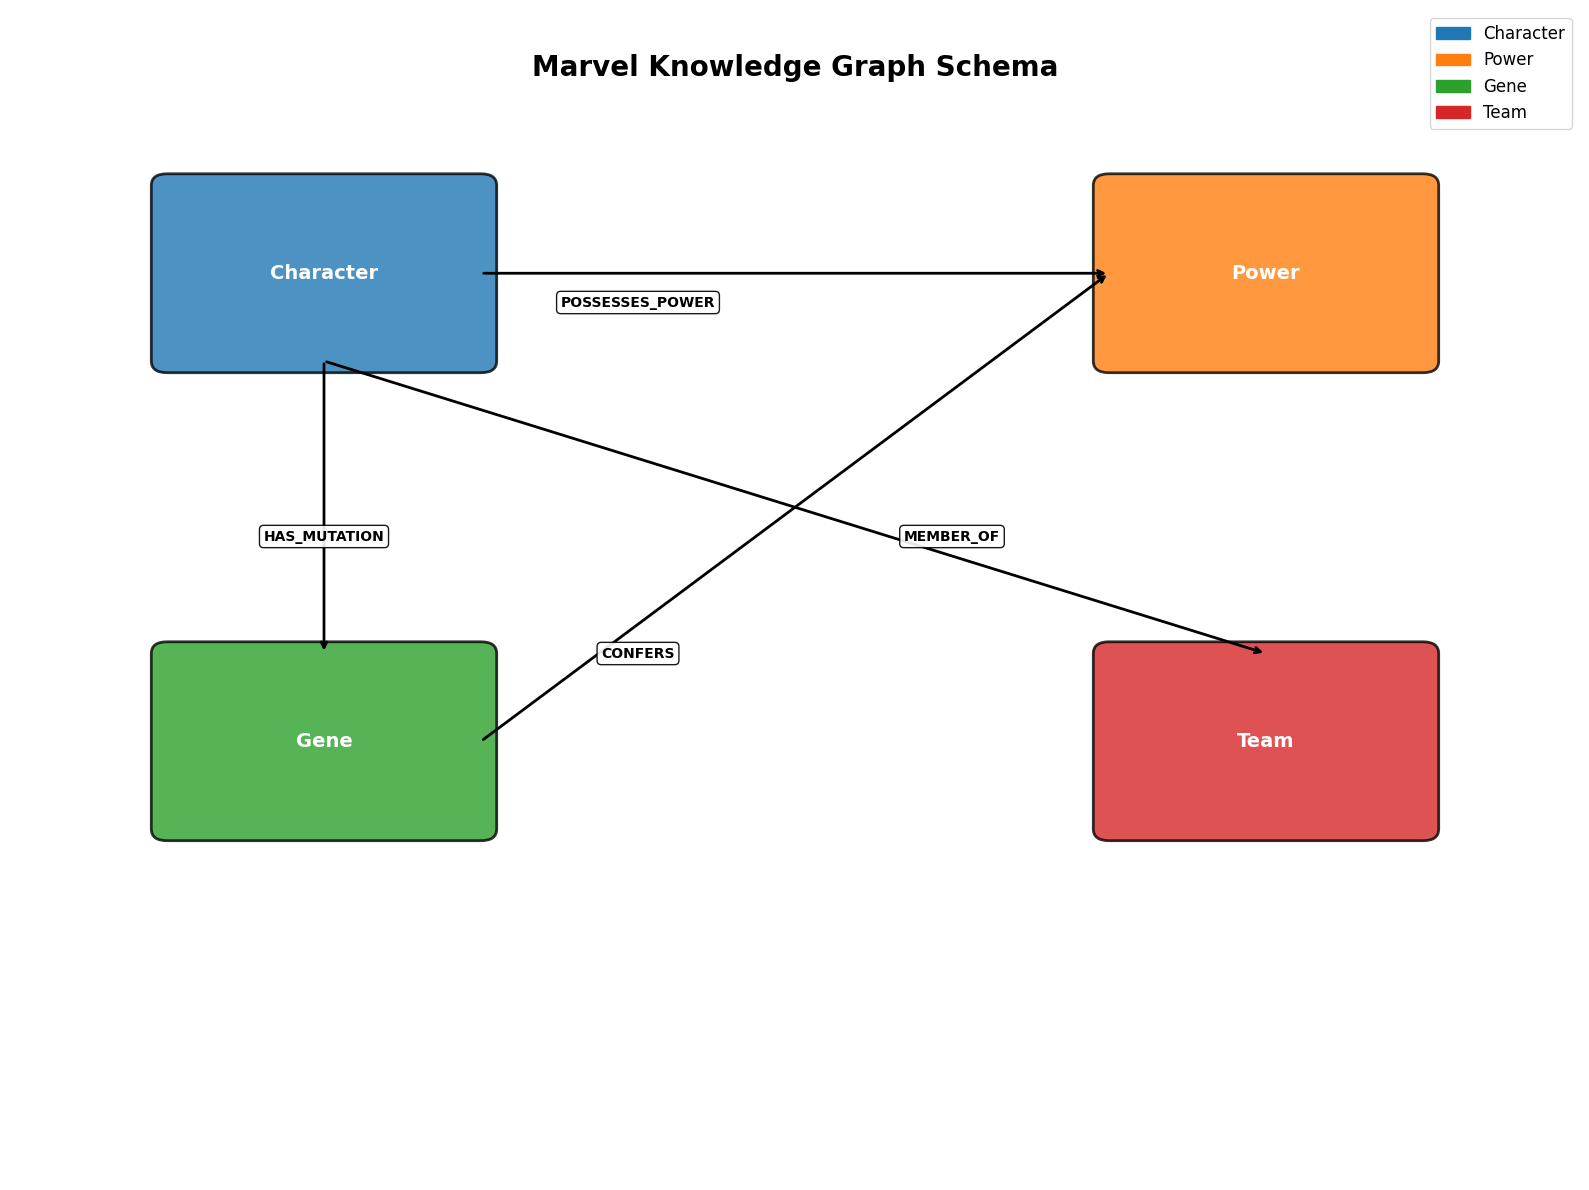

In [4]:
def create_entity_relationship_diagram():
    """Create a comprehensive entity-relationship diagram."""
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Define colors and positions
    colors = {
        'Character': '#1f77b4',
        'Power': '#ff7f0e', 
        'Gene': '#2ca02c',
        'Team': '#d62728'
    }
    
    # Entity positions (x, y, width, height)
    entities = {
        'Character': (1, 7, 2, 1.5),
        'Power': (7, 7, 2, 1.5),
        'Gene': (1, 3, 2, 1.5),
        'Team': (7, 3, 2, 1.5)
    }
    
    # Draw entities
    for entity_type, (x, y, w, h) in entities.items():
        # Create rounded rectangle
        box = FancyBboxPatch((x, y), w, h, 
                            boxstyle="round,pad=0.1",
                            facecolor=colors[entity_type],
                            edgecolor='black',
                            linewidth=2,
                            alpha=0.8)
        ax.add_patch(box)
        
        # Add text
        ax.text(x + w/2, y + h/2, entity_type, 
                ha='center', va='center', 
                fontsize=14, fontweight='bold', color='white')
    
    # Draw relationships
    relationships = [
        ('Character', 'Power', 'POSSESSES_POWER', (4, 7.5)),
        ('Character', 'Gene', 'HAS_MUTATION', (2, 5.5)),
        ('Gene', 'Power', 'CONFERS', (4, 4.5)),
        ('Character', 'Team', 'MEMBER_OF', (6, 5.5))
    ]
    
    for source, target, rel_type, (x, y) in relationships:
        # Draw arrow
        source_pos = entities[source]
        target_pos = entities[target]
        
        # Calculate arrow positions
        if source == 'Character' and target == 'Power':
            start_x, start_y = source_pos[0] + source_pos[2], source_pos[1] + source_pos[3]/2
            end_x, end_y = target_pos[0], target_pos[1] + target_pos[3]/2
        elif source == 'Character' and target == 'Gene':
            start_x, start_y = source_pos[0] + source_pos[2]/2, source_pos[1]
            end_x, end_y = target_pos[0] + target_pos[2]/2, target_pos[1] + target_pos[3]
        elif source == 'Gene' and target == 'Power':
            start_x, start_y = source_pos[0] + source_pos[2], source_pos[1] + source_pos[3]/2
            end_x, end_y = target_pos[0], target_pos[1] + target_pos[3]/2
        elif source == 'Character' and target == 'Team':
            start_x, start_y = source_pos[0] + source_pos[2]/2, source_pos[1]
            end_x, end_y = target_pos[0] + target_pos[2]/2, target_pos[1] + target_pos[3]
        
        # Draw arrow
        ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        # Add relationship label
        ax.text(x, y, rel_type, ha='center', va='center',
               fontsize=10, fontweight='bold', 
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))
    
    # Add title
    ax.text(5, 9.5, 'Marvel Knowledge Graph Schema', 
            ha='center', va='center', fontsize=20, fontweight='bold')
    
    # Add legend
    legend_elements = [mpatches.Patch(color=color, label=entity_type) 
                      for entity_type, color in colors.items()]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Run the entity-relationship diagram
create_entity_relationship_diagram()

## Visualized Marvel Knowledge Graph

/var/folders/8d/dx5d1c59375723kxxwg_pl5w0000gn/T/ipykernel_63341/676500200.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


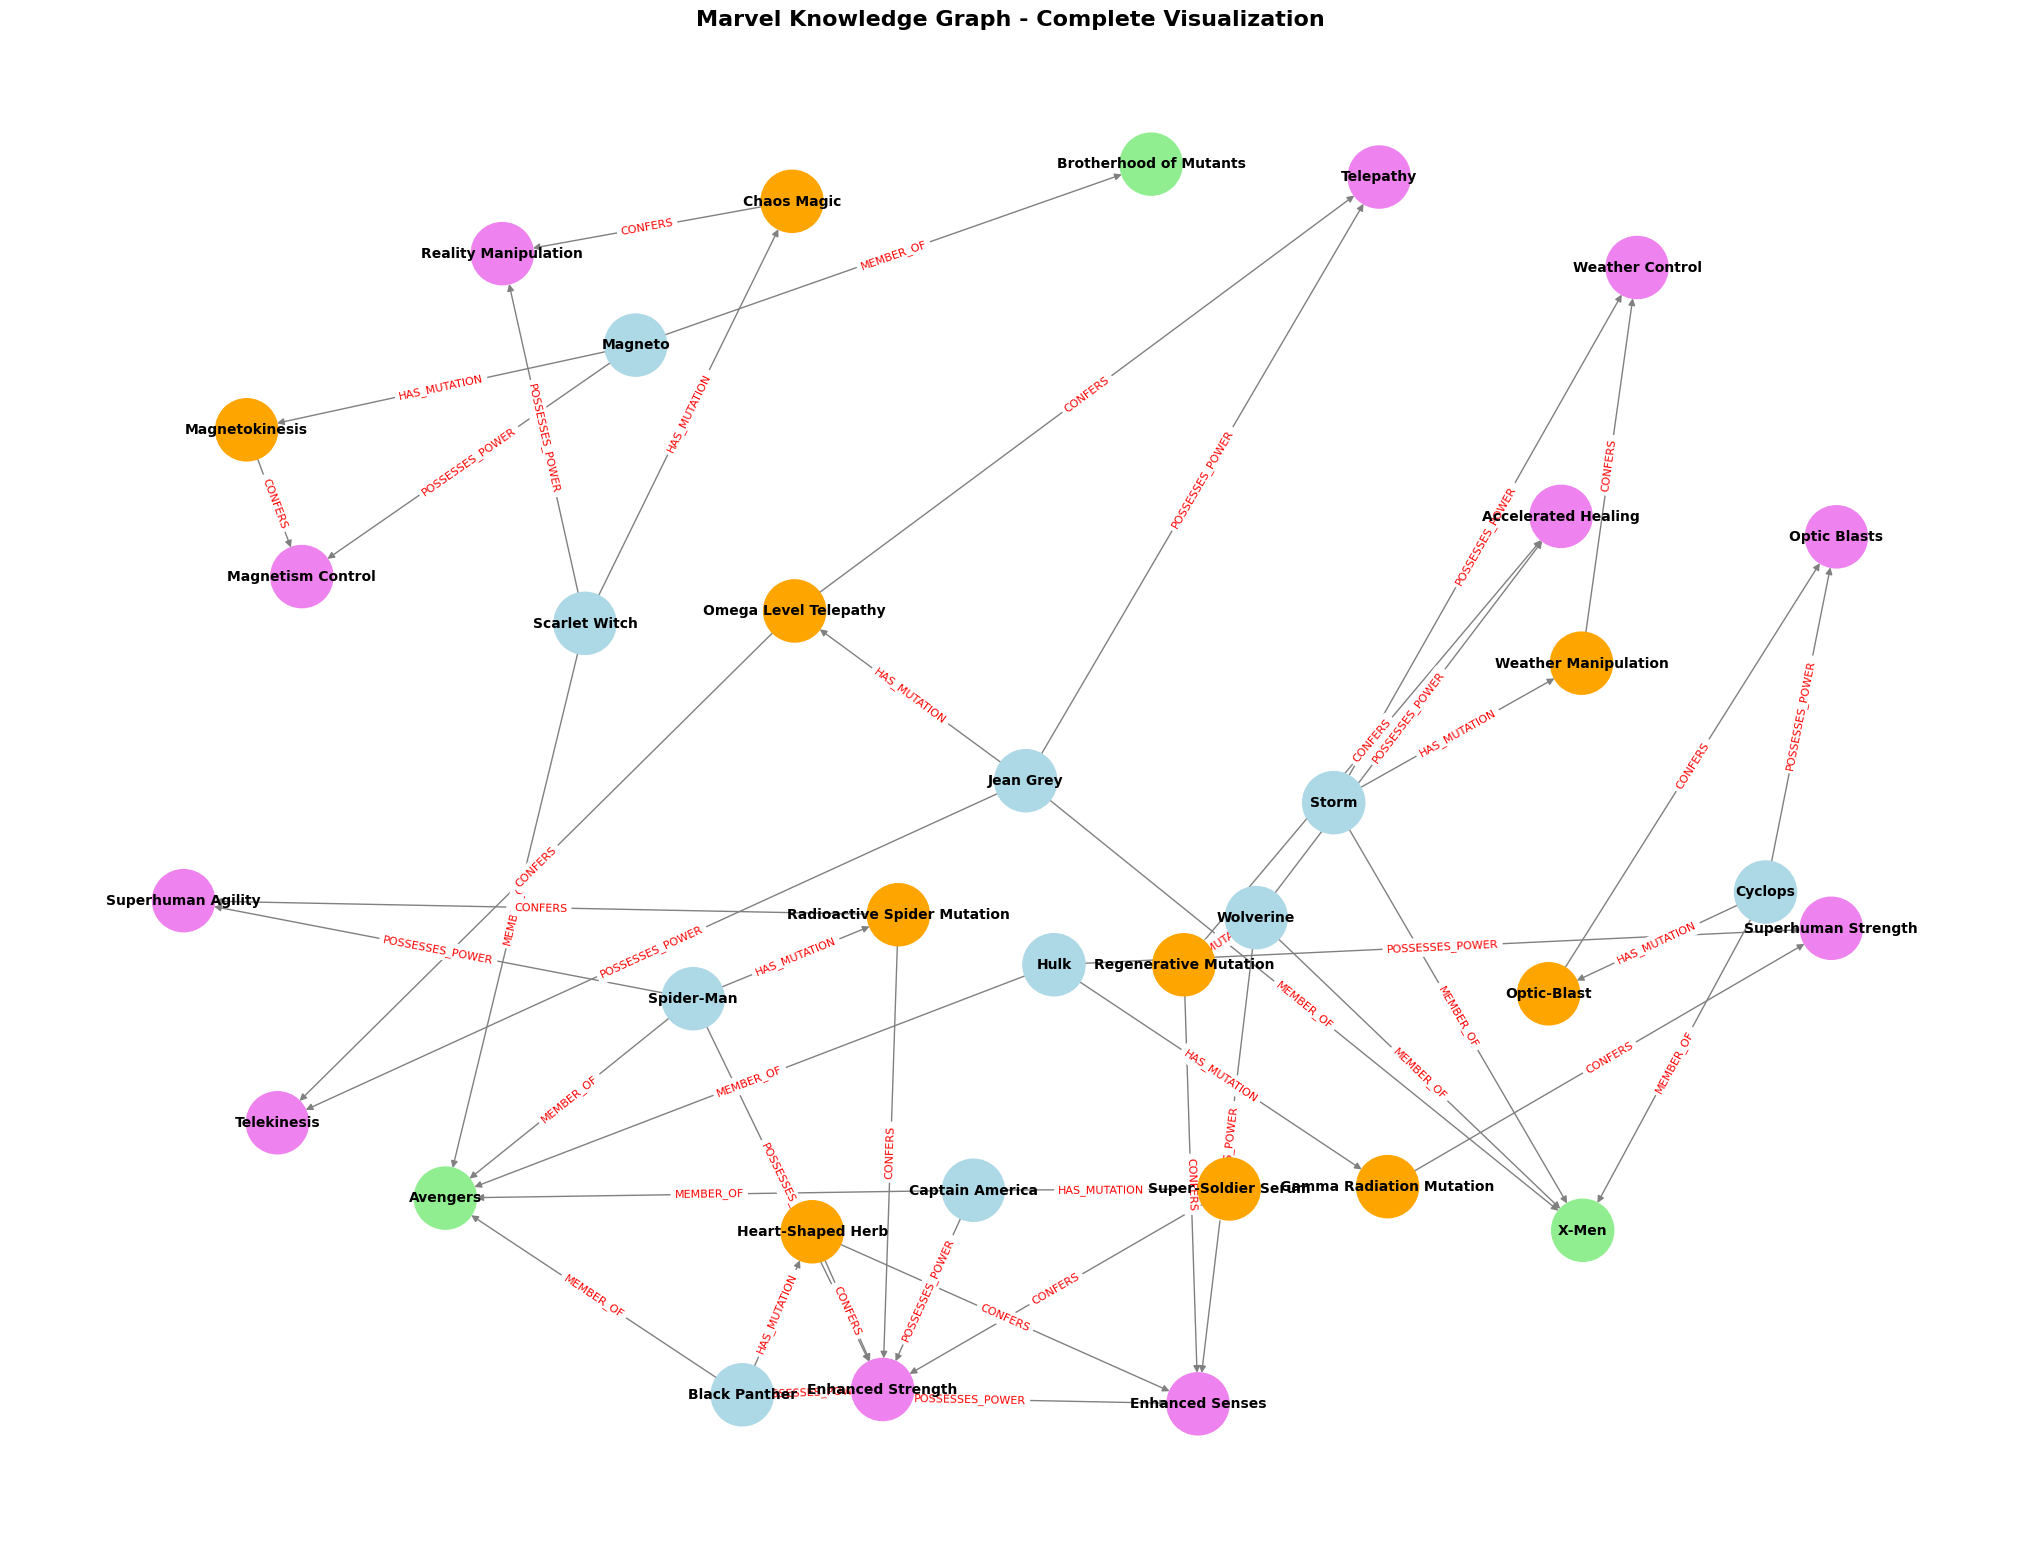

🎨 Colors: Blue=Character, Green=Team, Orange=Gene, Violet=Power


In [13]:
G = kg.G

# Assign colors by node type
color_map = []
for node, attr in G.nodes(data=True):
    if attr.get('label') == 'Character':
        color_map.append('lightblue')
    elif attr.get('label') == 'Team':
        color_map.append('lightgreen')
    elif attr.get('label') == 'Gene':
        color_map.append('orange')
    elif attr.get('label') == 'Power':
        color_map.append('violet')
    else:
        color_map.append('gray')

# Create the visualization
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.65, seed=42)

# Draw nodes
nx.draw(G, pos, 
        with_labels=True, 
        node_color=color_map, 
        node_size=2000, 
        font_size=10, 
        edge_color='gray', 
        font_weight='bold')

# Draw edge labels (handle multiedges)
edge_labels = {}
for edge in G.edges(data=True):
    u, v, data = edge
    if (u, v) not in edge_labels:
        edge_labels[(u, v)] = data.get('relation', '')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                            font_color='red', font_size=8)

plt.title('Marvel Knowledge Graph - Complete Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"🎨 Colors: Blue=Character, Green=Team, Orange=Gene, Violet=Power") 